In [1]:
import pandas as pd

import numpy as np
from scipy.stats import norm
from statistics import mean

import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1-D Monte Carlo hopping

In [ ]:
size = 20

# Gaussian disorder of hopping site position and energy levels
position = [i+norm.rvs(scale=0.2, size=1)[0] for i in range(size)]
energy = norm.rvs(scale=2, size=20)

plt.figure(figsize=(10,4)).set_facecolor('white')
plt.plot(position, energy, '_', ms=18, color='darkred')
plt.xticks([])
plt.xlabel('Hopping site', fontsize=12)
plt.ylabel('Relative energy', fontsize=12)
plt.savefig('1D_hopping_picture.png')
plt.show()

In my model I am considering fixed lattice sites with varied energy levels. The variation of these hopping site positions and energy levels is defined by a Gaussian (normal) distribution.

The functions below assume that the electron which is initialized in the first hopping site will always move forward - it only drifts throughout the device and there is no random-walk movement. 

In [219]:
def initialize_1d(Xvar, Evar, size):
    position = [i+norm.rvs(scale=Xvar, size=1)[0] for i in range(size)]
    energy = norm.rvs(scale=Evar, size=size)
    return [[position[i], energy[i]] for i in range(size)]

def hop_prob_turns(Z, site, E):
    if Z[site][1]+E > Z[site+1][1]:
        return 1*np.round(1/np.exp(-(Z[site+1][0]-Z[site][0])), decimals=0)
    else:
        return np.round(1/np.exp(-(Z[site+1][1]-Z[site][1]-E)), decimals=0)*np.round(1/np.exp(-(Z[site+1][0]-Z[site][0])), decimals=0)

def transit_time(Xvar, Evar, size, E):    
    Z = initialize_1d(Xvar, Evar, size)
    time = 0
    x = 0
    while x < size-1:
        time += hop_prob_turns(Z, x, E)
        x += 1
    return time

In [223]:
E = np.arange(0,2,0.05)
transits = [mean([transit_time(0.2, 1, 50, i) for runs in range(100)]) for i in E]

40

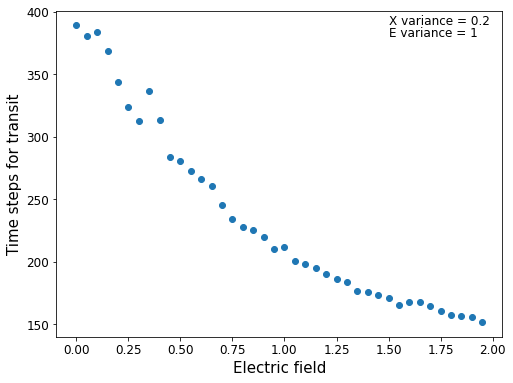

In [225]:
plt.figure(figsize=(8,6))
plt.plot(E, transits, 'o')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Electric field', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.text(1.5, 390, 'X variance = 0.2', fontsize=12)
plt.text(1.5, 380, 'E variance = 1', fontsize=12)
plt.show()

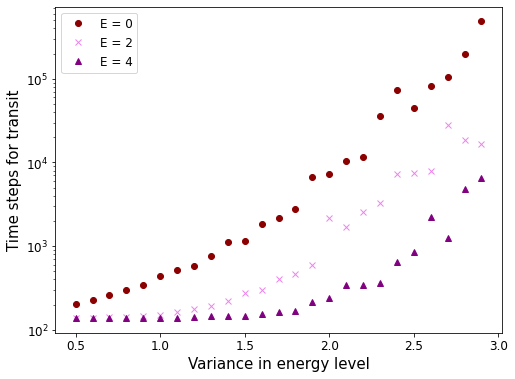

In [226]:
Evariance = np.arange(0.5,3,0.1)
plt.figure(figsize=(8,6)).set_facecolor('white')
plt.plot(Evariance, [mean([transit_time(0.2, i, 50, 0) for runs in range(100)]) for i in Evariance], 
         'o', color='darkred', label='E = 0')
plt.plot(Evariance, [mean([transit_time(0.2, i, 50, 2) for runs in range(100)]) for i in Evariance], 
         'x', color='violet', label='E = 2')
plt.plot(Evariance, [mean([transit_time(0.2, i, 50, 4) for runs in range(100)]) for i in Evariance], 
         '^', color='purple', label='E = 4')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Variance in energy level', fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('1D_Evar.png')
plt.show()

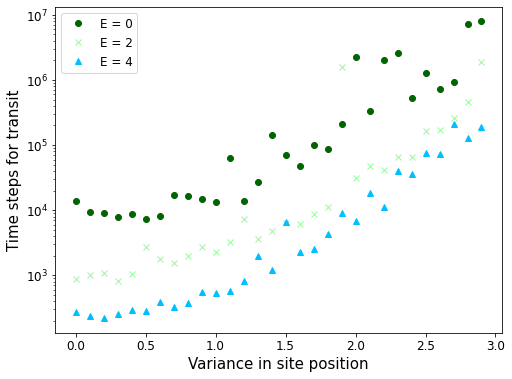

In [227]:
Xvariance = np.arange(0,3,0.1)
plt.figure(figsize=(8,6)).set_facecolor('white')
plt.plot(Xvariance, [mean([transit_time(i, 2, 50, 0) for runs in range(100)]) for i in Xvariance], 
         'o', color='darkgreen', label='E = 0')
plt.plot(Xvariance, [mean([transit_time(i, 2, 50, 2) for runs in range(100)]) for i in Xvariance], 
         'x', color='palegreen', label='E = 2')
plt.plot(Xvariance, [mean([transit_time(i, 2, 50, 4) for runs in range(100)]) for i in Xvariance], 
         '^', color='deepskyblue', label='E = 4')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Variance in site position', fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('1D_Xvar.png')
plt.show()

# 2-D Monte Carlo hopping

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x, y = np.arange(1,11), np.arange(1,11)
X, Y = np.meshgrid(x, y)
Z = norm.rvs(size=100).reshape(10,10)
ax.plot_surface(X, Y, Z, alpha=0.7)
ax.scatter(X, Y, Z, c=Z, linewidth=3.0)
plt.xlabel('x lattice site', fontsize=12)
plt.ylabel('y lattice site', fontsize=12)
ax.view_init(85,45)
plt.savefig('2D_grid.png')
plt.show()

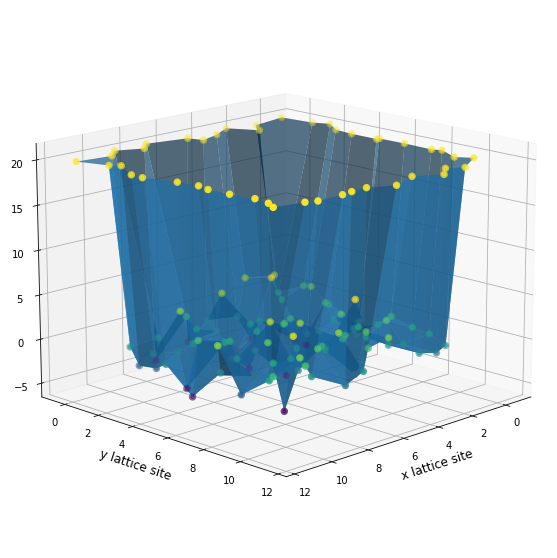

In [2]:
def initialize(posVar, Evar, size):
    x, y = np.arange(size+2), np.arange(size+2)
    X, Y = np.meshgrid(x, y)
    # rewriting X and Y to include the positional disorder
    X = np.round([[elem+norm.rvs(scale=posVar, size=1)[0] for elem in X[i]] for i in np.arange(size+2)], decimals=3)
    Y = np.round([[elem+norm.rvs(scale=posVar, size=1)[0] for elem in Y[j]] for j in np.arange(size+2)], decimals=3)
    energy = np.round(norm.rvs(scale=Evar, size=size**2).reshape(size, size), decimals=3)
    # creating a boundary around the grid
    Ewall = Evar*10
    energy = np.insert(energy, 0, Ewall, axis=1)
    energy = np.insert(energy, len(X)-1, Ewall, axis=1)
    edge = [Ewall]*(size+2)
    energy = np.insert(energy, 0, edge, axis=0)
    energy = np.append(energy, [edge], axis=0)
    return X, Y, energy

X, Y, Z = initialize(0.3, 2, 10)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.7)
ax.scatter(X, Y, Z, c=Z, linewidth=3.0, vmax=4)
plt.xlabel('x lattice site', fontsize=12)
plt.ylabel('y lattice site', fontsize=12)
ax.view_init(15,45)
plt.savefig('2D_grid_with_boundary.png')
plt.show()

In [3]:
# returns a 3x3x2 matrix of the hopping sites around a site with index i and j
def subspace(i, j):
    return np.array([[[i-1,j+1],[i,j+1],[i+1,j+1]],[[i-1,j],[i,j],[i+1,j]],[[i-1,j-1],[i,j-1],[i+1,j-1]]])

def pos_array(X, Y):
    pos = np.array([])
    for i in range(len(X)):
        for j in range(len(Y)):
            pos = np.append(pos, [X[i][j], Y[i][j]])
    return pos.reshape(len(X),len(Y),2)

# function which returns the nearby site positions and probilities of hopping to each site
def hop_prob(i, j, pos, energy, E_field):    
    probs = np.array([])
    
    area = subspace(i, j)
    # calculate the probability of hopping based on site position and energy disorder
    for row in area:
        for elem in row:
            if elem[0] == i and elem[1] == j:
                probs = np.append(probs, 0)
            elif elem[0] == 0 or elem[0] == len(X)-1:
                probs = np.append(probs, 0)
            elif elem[1] == 0 or elem[1] == len(X)-1:
                probs = np.append(probs, 0)
            else:
                dx = pos[elem[0]][elem[1]][0] - pos[i][j][0]
                dy = pos[elem[0]][elem[1]][1] - pos[i][j][1]
                prob_pos = 5*np.exp(-np.sqrt(dx**2+dy**2)) # 5 included to help normalise numbers, is arbitrary
                Esite = energy[i][j]
                Eother = energy[elem[0]][elem[1]]
                if Eother > Esite:
                    prob_energy = np.exp(-(Eother-Esite))
                else:
                    prob_energy = 1
                probs = np.append(probs, prob_pos*prob_energy)
    
    # add in probability based on electric field (DRIFT)
    step = E_field/5 # SCALING SET TO 5, INCREASE IF WANTING TO TEST FIELDS ABOVE 5
    factor = [1.0-step, 1.0, 1.0+step]
    
    for elem in range(len(probs)):
        if elem%3 == 0:
            probs[elem] = probs[elem]*factor[0]
        elif elem%3 == 1:
            probs[elem] = probs[elem]*factor[1]
        else:
            probs[elem] = probs[elem]*factor[2]
        
    # add in probability based on random walk (DIFFUSION)
    diff_choice = random.choices(np.arange(9))
    probs[diff_choice[0]] = probs[diff_choice[0]]*1.5

    # select the next coordinates to move to based on the probabilistic weights for each site
    choice = random.choices(np.arange(9), weights=np.ravel(probs))
    # return the next coordinate indices and the corresponding hopping rate to that site
    return area[choice[0]//3][choice[0]%3], probs[choice[0]]
    #return probs.reshape(3,3)

In [4]:
X, Y, energy = initialize(2, 1, 10)
pos = pos_array(X, Y)

transits_0, transits_2, transits_4 = [], [], []

# starting coordinates (MUST BE OUTSIDE OF BOUNDARY WALL)
for runs in range(100):
    for j in np.arange(1,len(Y)-1):
        time = 0
        i = 1
        while i < (len(X)-2):
            new_cords, rate = hop_prob(i, j, pos, energy, 0)
            time += 1/rate
            i, j = new_cords[0], new_cords[1]
        transits_0.append(time)
        
for runs in range(100):
    for j in np.arange(1,len(Y)-1):
        time = 0
        i = 1
        while i < (len(X)-2):
            new_cords, rate = hop_prob(i, j, pos, energy, 2)
            time += 1/rate
            i, j = new_cords[0], new_cords[1]
        transits_2.append(time)
        
for runs in range(100):
    for j in np.arange(1,len(X)-1):
        time = 0
        i = 1
        while i < (len(X)-2):
            new_cords, rate = hop_prob(i, j, pos, energy, 4)
            time += 1/rate
            i, j = new_cords[0], new_cords[1]
        transits_4.append(time)

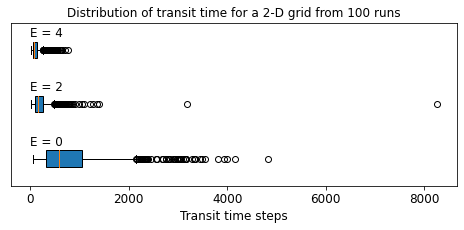

In [5]:
plt.figure(figsize=(8,3))
plt.boxplot([transits_0, transits_2, transits_4], vert=False, patch_artist=True)
plt.xlabel('Transit time steps', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([])
plt.title('Distribution of transit time for a 2-D grid from 100 runs')
plt.text(0,1.25,'E = 0', fontsize=12)
plt.text(0,2.25,'E = 2', fontsize=12)
plt.text(0,3.25,'E = 4', fontsize=12)
plt.show()

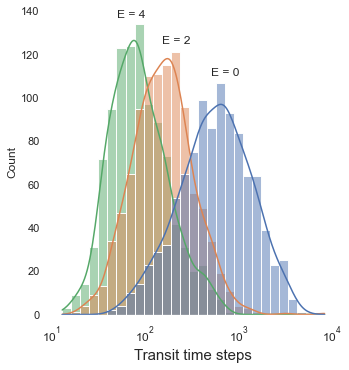

In [19]:
sns.axes_style('white')
sns.displot([transits_0,transits_2,transits_4], kind='hist', kde=True, log_scale=True, legend=False)
plt.xlabel('Transit time steps', fontsize=15)
plt.xticks(fontsize=12)
plt.text(500,110,'E = 0', fontsize=12)
plt.text(150,125,'E = 2', fontsize=12)
plt.text(50,137,'E = 4', fontsize=12)
plt.savefig('2D_times_varied_E.png')
plt.show()